# Apprentice Chef - Exploration

> *by Jack Daoud, February 11th 2021*

# Setup

In [1]:
# Set up environment with libraries & data

##############################################################################
# Import libraries

import pandas as pd                     # data sceince essentials
import matplotlib.pyplot as plt         # essential graphical output
import seaborn as sns                   # enhanced visualizations
import numpy as np                      # mathematical essentials
from tqdm.notebook import tqdm          # progress bars
import time                             # time essentials

# Set Pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##############################################################################
# Import data

# Specify file name
file_data = './_data/Apprentice_Chef_Dataset.xlsx'

# Read file into Python
chefs = pd.read_excel(io     = file_data,
                      header = 0)

##############################################################################
# Fix data

# Rename LARGEST_ORDER_SIZE to AVG_MEALS_ORDERED
chefs.rename(columns={'LARGEST_ORDER_SIZE':'AVG_MEALS_ORDERED'}, inplace=True)

# Print dimensions of data
print(f"""
Size of Original Dataset
------------------------
Observations: {chefs.shape[0]}
Features:     {chefs.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



# Variables & Description

#### Continuous
- `REVENUE`: Total revenue generated from each customer. Note that at times discounts are applied due to special circumstances, but this is extremely rare and not recorded in a separate column.
- `AVG_TIME_PER_SITE_VISIT`: Average time each customer spent per website or mobile app visit.
- `TOTAL_MEALS_ORDERED`: Total number of meals ordered by each customer. Customers can order several meals at one time.
- `AVG_PREP_VID_TIME`: Average time in seconds meal prep instruction video was was playing.
- `TOTAL_PHOTOS_VIEWED`: Total number of clicks on photos across all website or mobile app visits.

#### Interval/Count

- `UNIQUE_MEALS_PURCH`: Number of unique meal sets ordered by each customer.
- `CONTACTS_W_CUSTOMER_SERVICE`: Number of times each customer made contact with customer service. This number does not include rating meal sets or completing satisfaction surveys.
- `PRODUCT_CATEGORIES_VIEWED`: Total number of meal categories viewed (vegan, etc.).
- `CANCELLATIONS_BEFORE_NOON`: Number of meals canceled BEFORE 12:00 PM (noon) as per cancelation policy.
- `CANCELLATIONS_AFTER_NOON`: Number of meals canceled AFTER 12:00 PM (noon) as per cancelation policy.
- `MOBILE_LOGINS`: Total number of logins to the mobile platform.
- `PC_LOGINS`: Total number of logins to the website.
- `WEEKLY_PLAN`: Number of weeks customer subscribed to the weekly plan discount promotion.
- `EARLY_DELIVERIES`: Total meal deliveries that arrived early.
- `LATE_DELIVERIES`: Total meal deliveries that arrived late.
- `MASTER_CLASSES_ATTENDED`: Number of times each customer attended a master cooking class (1 class per quarter).
- `MEDIAN_MEAL_RATING`: Median rating of meal sets by each customer
- `AVG_MEALS_ORDERED`: Average number of meals ordered per customer.
- `AVG_CLICKS_PER_VISIT`: Average number of clicks per site or mobile app visit



#### Categorical
- `CROSS_SELL_SUCCESS`: Success of the cross-sell promotion (1 = yes, 0 = no).
- `MOBILE_NUMBER`: Indicates whether the registered phone number of a custmer is mobile or landline (1 = mobile, 0 = landline).
- `TASTES_AND_PREFERENCES`: Customer specified their tastes and preferences in their profile (optional).
- `PACKAGE_LOCKER`: Customer's residence/building has a package locker service or package room.
- `REFRIGERATED_LOCKER`: Package locker has refrigerated compartments.

#### Personal Identification Information (PII)
- `NAME`
- `EMAIL`
- `FIRST_NAME`
- `LAST_NAME`

# Exploration

## Response Variable

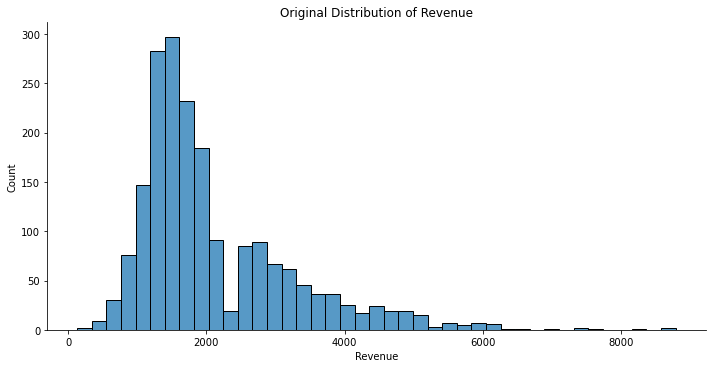

In [2]:
# Plot original distribution of Revenue

# Create histogram
sns.displot(data   = chefs,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)

# Label title & axis
plt.title(label   = 'Original Distribution of Revenue')
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Count')

# Display plot
plt.show()

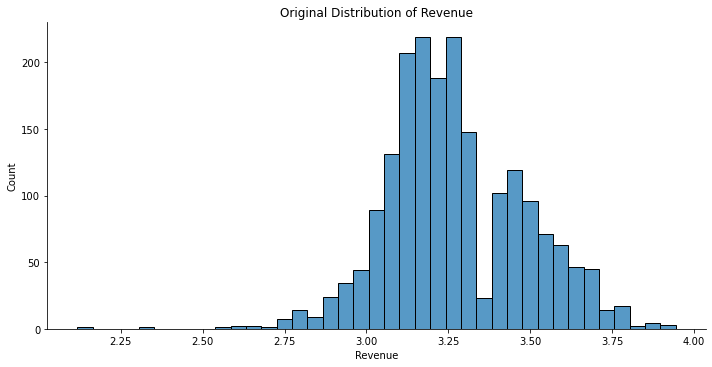

In [3]:
# Plot logarithmic distribution of Revenue

# log transforming REVENUE and saving it to the dataset
chefs['log_REVENUE'] = np.log10(chefs['REVENUE'])

# Plot original distribution of Revenue

# Create histogram
sns.displot(data   = chefs,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)

# Label title & axis
plt.title(label   = 'Original Distribution of Revenue')
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Count')

# Display plot
plt.show()

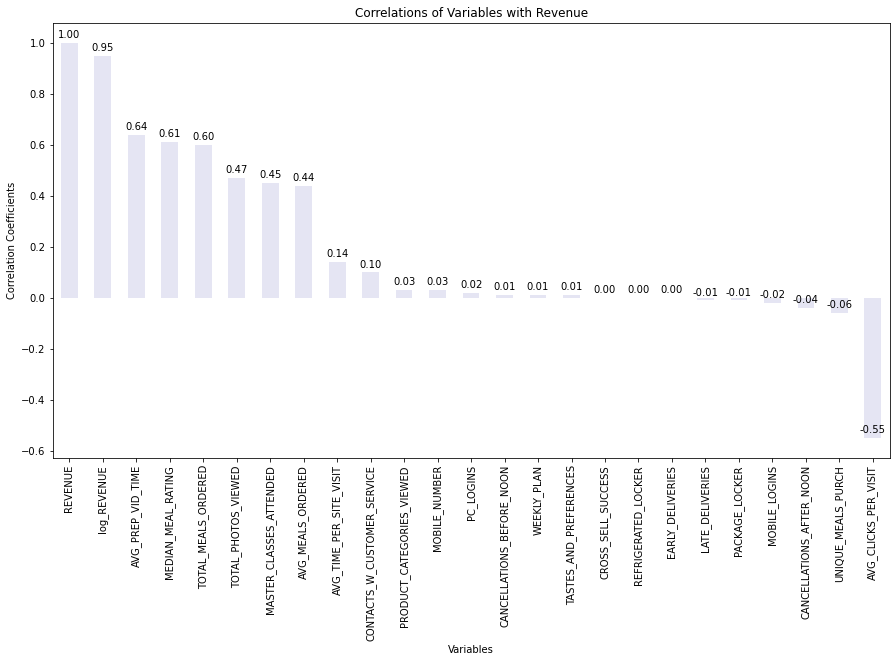

In [4]:
# Plot correlation coefficients of "REVENUE" with other variables:

plt.figure(figsize=(15,8))

ax = chefs.corr()['REVENUE'] \
          .sort_values(ascending = False)\
          .round(2)\
          .plot(kind = 'bar', color = 'darkblue', alpha = 0.1)

ax.set_title('Correlations of Variables with Revenue')
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficients')

#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    
# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points')

<br><br>

## Explanatory Variables

### Continuous 

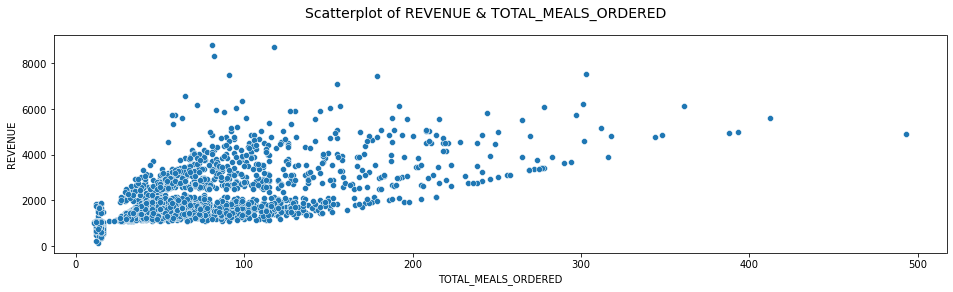

Descriptive Statistics: 
 count    1946.000000
mean       74.634121
std        55.309782
min        11.000000
25%        39.000000
50%        60.000000
75%        95.000000
max       493.000000
Name: TOTAL_MEALS_ORDERED, dtype: float64


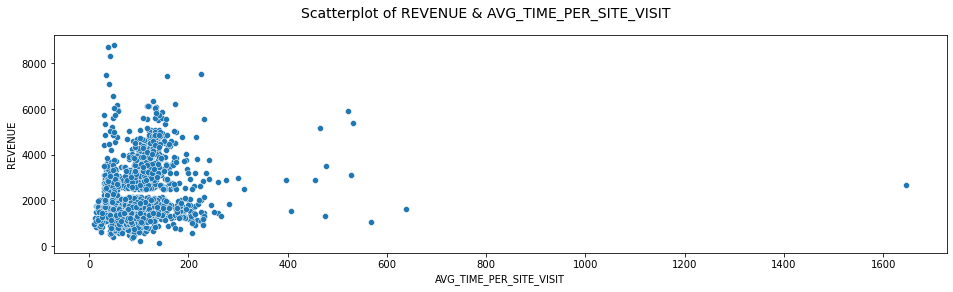

Descriptive Statistics: 
 count    1946.000000
mean       99.604651
std        62.341756
min        10.330000
25%        72.000000
50%        94.160000
75%       117.287500
max      1645.600000
Name: AVG_TIME_PER_SITE_VISIT, dtype: float64


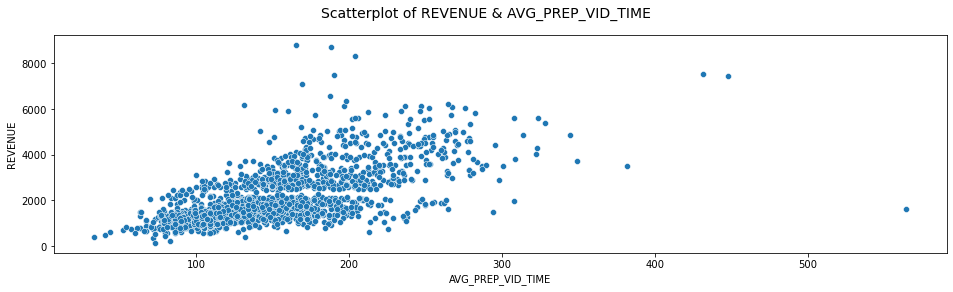

Descriptive Statistics: 
 count    1946.000000
mean      150.556578
std        49.447180
min        33.400000
25%       114.400000
50%       145.600000
75%       173.775000
max       564.200000
Name: AVG_PREP_VID_TIME, dtype: float64


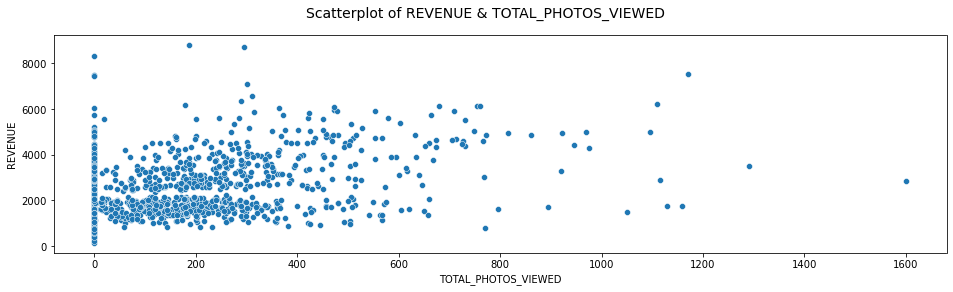

Descriptive Statistics: 
 count    1946.000000
mean      106.433710
std       181.014124
min         0.000000
25%         0.000000
50%         0.000000
75%       174.000000
max      1600.000000
Name: TOTAL_PHOTOS_VIEWED, dtype: float64


In [5]:
# Plot scatter plots for continuous variables

continuous_variables = ['AVG_TIME_PER_SITE_VISIT', 
                        'AVG_PREP_VID_TIME', 
                        'TOTAL_PHOTOS_VIEWED',
                        'TOTAL_MEALS_ORDERED']

# Define function to plot distributions of variables
def scatterplot(data, y_variable, x_variable):
    """
    Plot scatterplots of continuous variables against REVENUE
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(16,4)
    fig.suptitle("Scatterplot of REVENUE & " + x_variable, fontsize=14)
    sns.scatterplot(data=data, x=x_variable, y=y_variable)
    plt.show()
    
    print("Descriptive Statistics: \n",
          data[x_variable].describe())
    
# Loop through each continuous variable in our data set and run the predefined function
for col in chefs.columns:
    if col in continuous_variables:
        scatterplot(data = chefs, y_variable = 'REVENUE', x_variable = col)

<br><br>

### Integer / Count

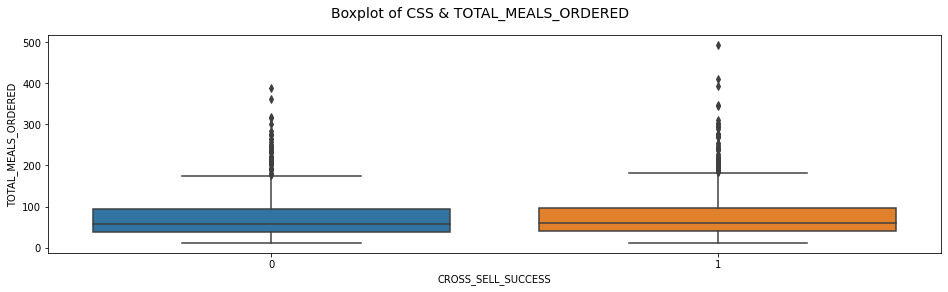

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





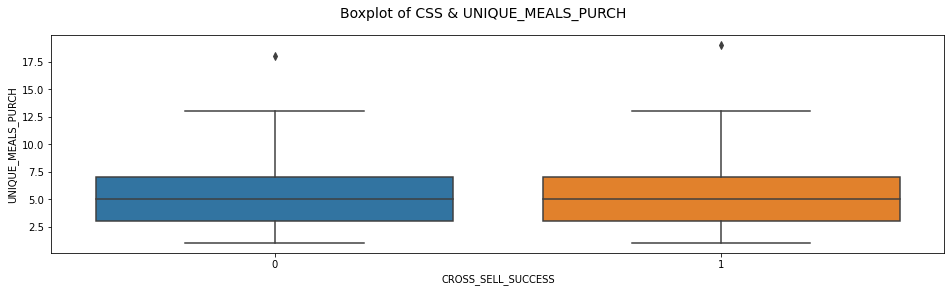

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





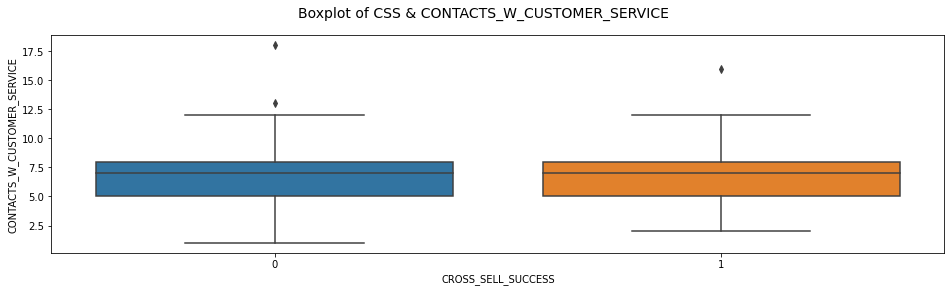

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





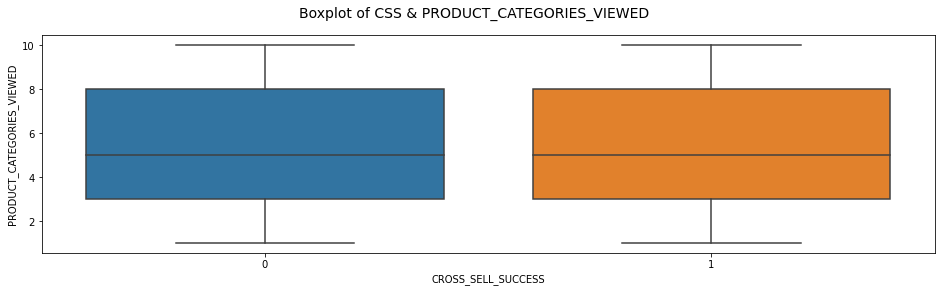

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





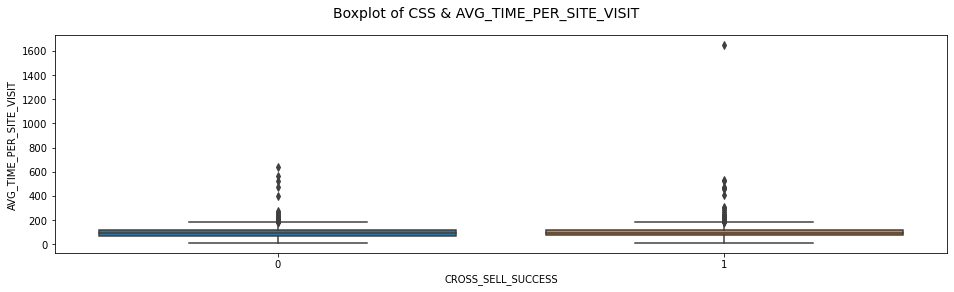

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





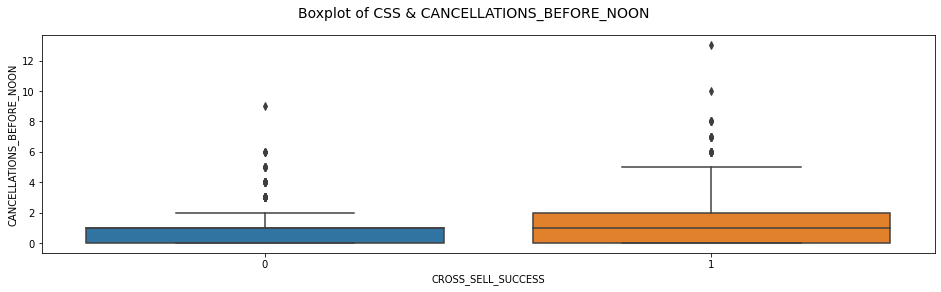

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





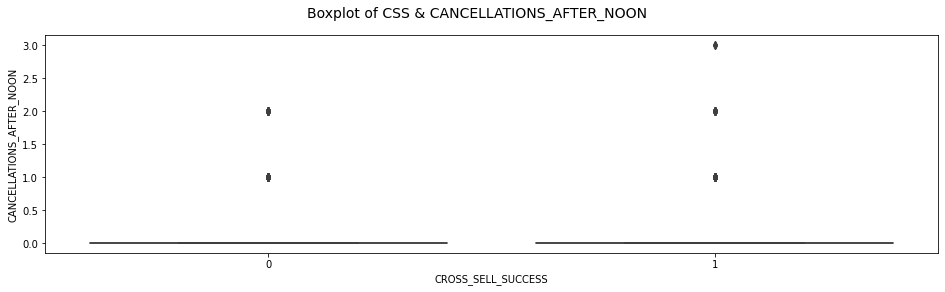

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





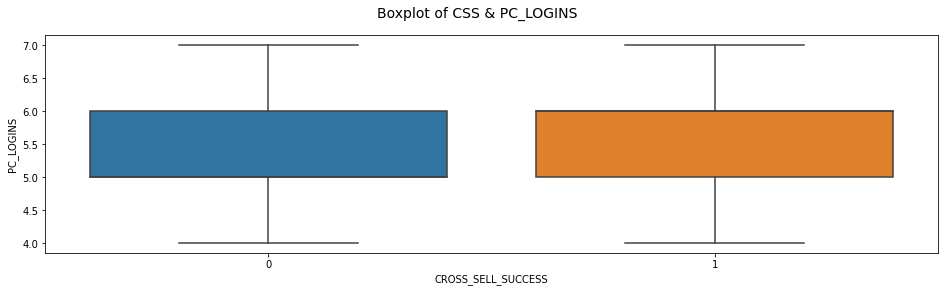

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





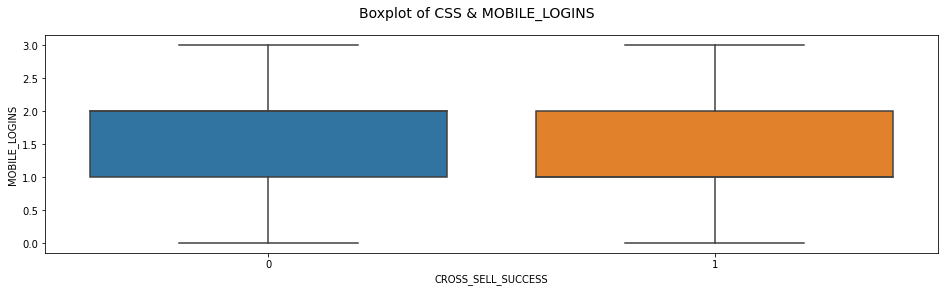

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





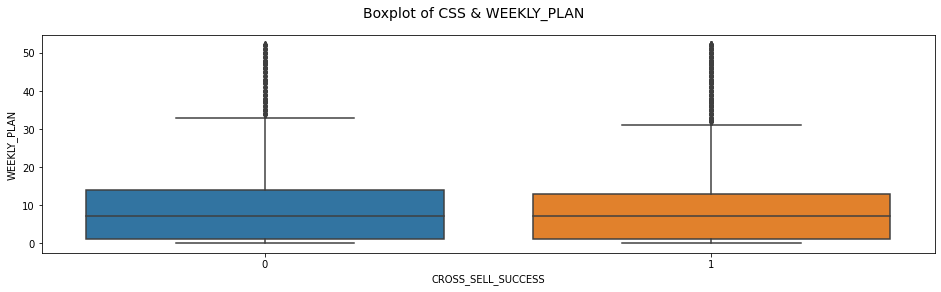

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





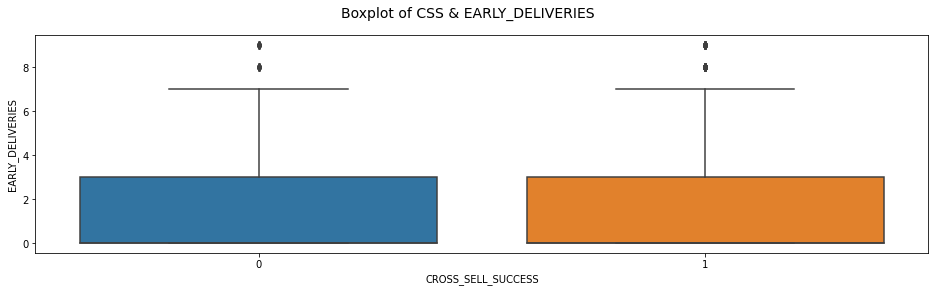

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





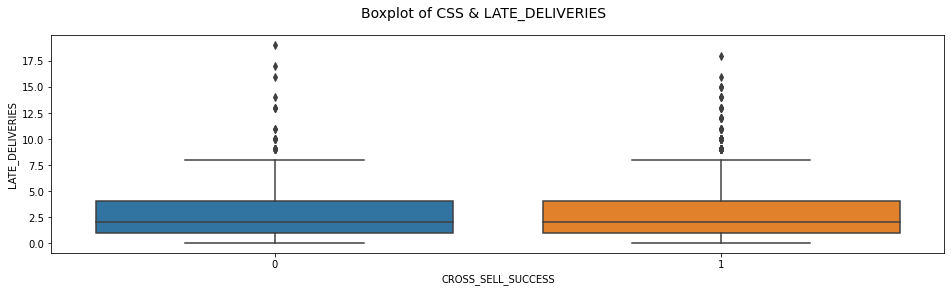

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





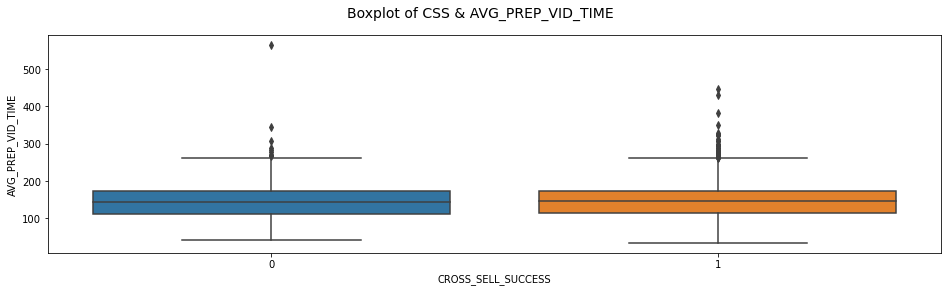

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





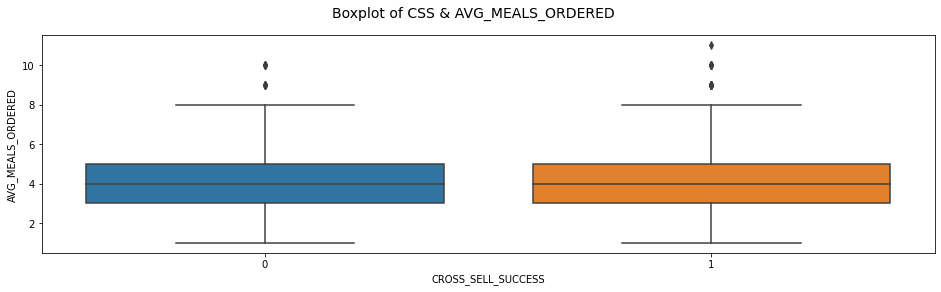

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





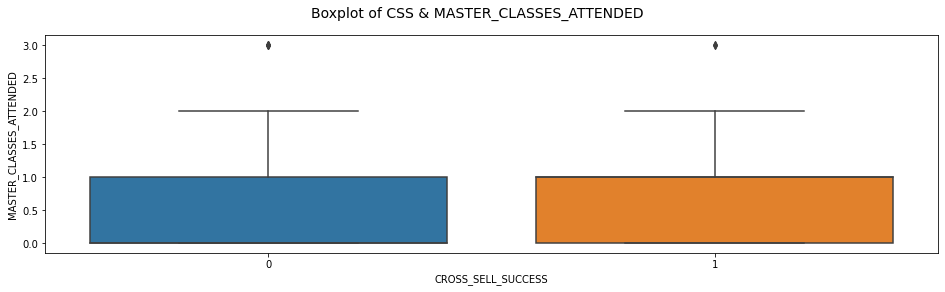

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





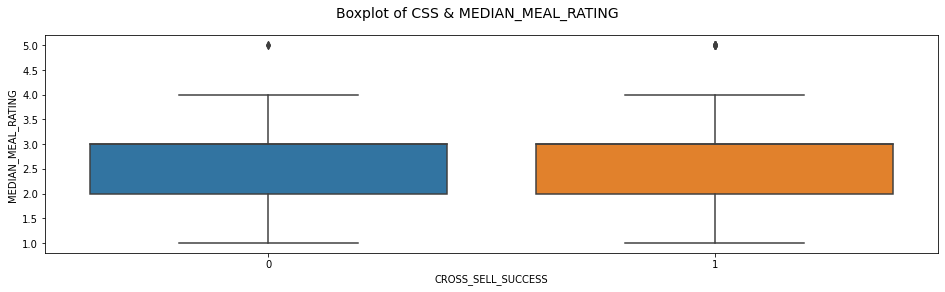

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





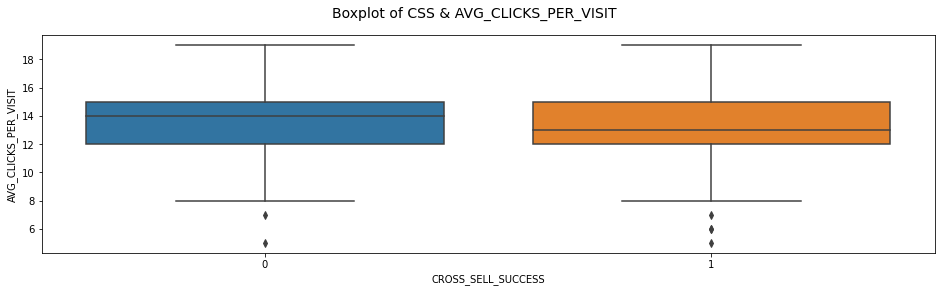

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





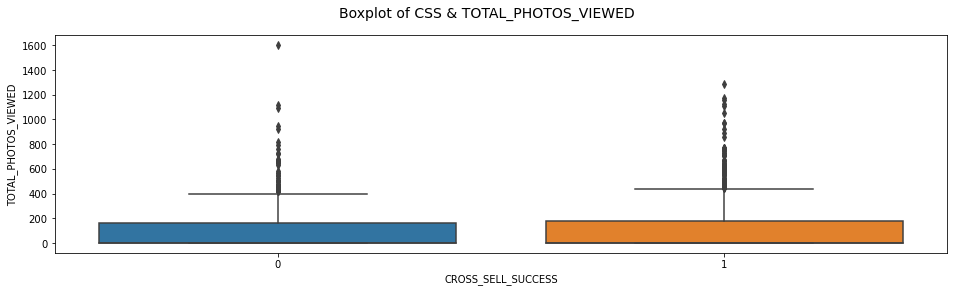

Descriptive Statistics: 

count    1946.000000
mean        0.678828
std         0.467047
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CROSS_SELL_SUCCESS, dtype: float64

Counts: 

0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64
------------------------------------------------------------------------------------





In [6]:
# Plot box plots for integer / count variables

count_variables = ['UNIQUE_MEALS_PURCH', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 
                   'PRODUCT_CATEGORIES_VIEWED',
                   'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON',
                   'MOBILE_LOGINS',
                   'PC_LOGINS',
                   'WEEKLY_PLAN',
                   'EARLY_DELIVERIES',
                   'LATE_DELIVERIES',
                   'MASTER_CLASSES_ATTENDED',
                   'MEDIAN_MEAL_RATING',
                   'AVG_MEALS_ORDERED',
                   'AVG_CLICKS_PER_VISIT',
                  'AVG_TIME_PER_SITE_VISIT', 
                        'AVG_PREP_VID_TIME', 
                        'TOTAL_PHOTOS_VIEWED',
                        'TOTAL_MEALS_ORDERED']

# Define function to plot distributions of variables
def boxplot(data, y_variable, x_variable):
    """
    Plot boxplots of count/integer variables against REVENUE
    """
    fig, ax = plt.subplots(1)
    fig.set_size_inches(16,4)
    fig.suptitle("Boxplot of CSS & " + y_variable, fontsize=14)
    sns.boxplot(data=data, x=x_variable, y=y_variable)
    plt.show()
    
    print("Descriptive Statistics: \n",
          data[x_variable].describe(),
          "\nCounts: \n",
          data[x_variable].value_counts(normalize = False).sort_index(),
          "------------------------------------------------------------------------------------\n\n\n",
          sep = '\n')
    
# Loop through each continuous variable in our data set and run the predefined function
for col in chefs.columns:
    if col in count_variables:
        boxplot(data = chefs, y_variable = col, x_variable = 'CROSS_SELL_SUCCESS')

# Transformation Checks

In [7]:
# Function to plot 4 boxplots of variables & their log versions

def boxplot_log(data, response, explanatory):
    
    log_response    = np.log10(data[response])
    log_explanatory = np.log10(data[explanatory])
    
    # setting figure size
    fig, ax = plt.subplots(figsize = (15, 10))


    ## Plot 1: Original X, Original Y ##
    plt.subplot(2, 2, 1)

    sns.boxplot(x     = explanatory,
                y     = response,
                data  = data)


    # titles and labels
    plt.title(label   = 'Original X, Original Y')
    plt.xlabel(xlabel = explanatory)
    plt.ylabel(ylabel = response)



    ## Plot 2: Log X, Original Y ##
    plt.subplot(2, 2, 2)
    sns.boxplot(x     = log_explanatory,
                y     = response,
                data  = data)


    # titles and labels
    plt.title(label   = 'Log X, Original Y')
    plt.xlabel(xlabel = explanatory)
    plt.ylabel(ylabel = response)


    ## Plot 3: Original X, Log Y ##
    plt.subplot(2, 2, 3)
    sns.boxplot(x     = explanatory,
                y     = log_response,
                data  = data)


    # titles and labels
    plt.title(label   = 'Original X, Log Y')
    plt.xlabel(xlabel = explanatory)
    plt.ylabel(ylabel = response)


    ## Plot 4: Log X, Log Y ##
    plt.subplot(2, 2, 4)
    sns.boxplot(x     = log_explanatory,
                y     = log_response,
                data  = data)


    # titles and labels
    plt.title(label   = 'Log X, Log Y')
    plt.xlabel(xlabel = explanatory)
    plt.ylabel(ylabel = response)


    ## displaying the visuals ##
    plt.tight_layout()
    plt.show()

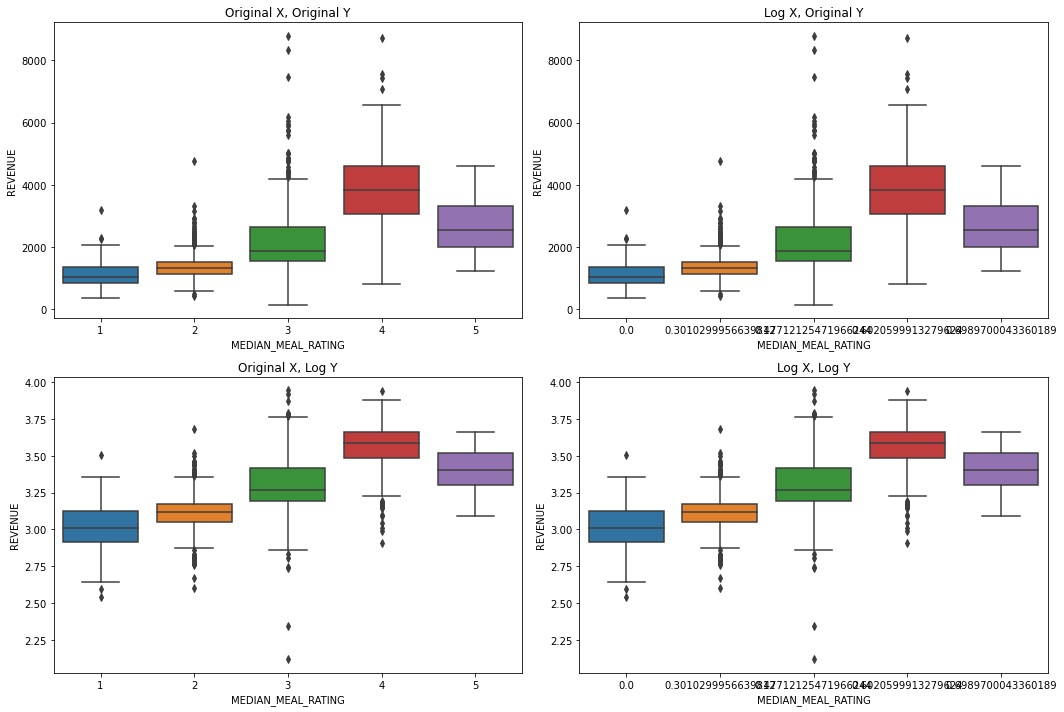

In [8]:
boxplot_log(chefs, 'REVENUE', 'MEDIAN_MEAL_RATING')

<br><br>

## Correlations

In [9]:
# HASHED OUT Calculate and plot correlation coefficients

# Create correlation matrix
#corr = chefs.corr(method = 'pearson').round(decimals = 2)

# Set figure size
#fig, ax = plt.subplots(figsize=(20,12))

# Plot lower triangle and remove diagonal
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True    

# Develop heatmap plot
#sns.heatmap(data       = corr, # the correlation matrix
#            cmap       = 'cividis',     
#            robust     = True,
#            square     = True,          
#            annot      = True,                 
#            linewidths = 0.25,
#            mask       = mask, 
#            annot_kws={"fontsize":10})


# Title & display plot
#ax.set_title("Correlation Coefficients for Vairables")
#plt.show()

In [10]:
# HASHED OUT Avoid Multicollinearity

# Filter out variable with correlation of > 0.8

# Code adapted from:
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

# Create an boolean array of our columns and set their values to True
#columns = np.full((corr.shape[0],), True, dtype=bool)

# Loop over variables
#for variable_1 in range(corr.shape[0]):
    
    # Loop over variables again
#    for variable_2 in range(variable_1 + 1, corr.shape[0]):
        
        # If the correlation b/w variable 1 & 2 is equal to or greater than 0.8
#        if corr.iloc[variable_1, variable_2] >= 0.8:
            
            # Set the boolean of that variable to False
#            if columns[variable_2]:
#                columns[variable_2] = False
                
# Finalized list of variables with no multicollinearity                
#selected_columns = chefs.columns[columns]

# Remove variables that are highly correlated
#chefs = chefs[selected_columns]

# Add log_REVENUE again because it was removed
#chefs['log_REVENUE'] = np.log10(chefs['REVENUE'])